# FLIGHT PRICE PREDICTION                                                    

# Data Encoding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_excel("Data_Train.xls")
data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9491,IndiGo,3/04/2019,Delhi,Cochin,DEL → HYD → COK,07:35,12:10,4h 35m,1 stop,No info,5073
5404,IndiGo,03/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,8855
5164,Air India,1/05/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,07:55 02 May,19h 55m,2 stops,No info,10151
8660,Jet Airways,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,18:15 13 Jun,25h 45m,1 stop,In-flight meal not included,8529
370,Vistara,15/04/2019,Delhi,Cochin,DEL → COK,06:00,09:10,3h 10m,non-stop,No info,6216
4888,IndiGo,15/04/2019,Banglore,Delhi,BLR → DEL,22:10,01:00 16 Apr,2h 50m,non-stop,No info,3943
9416,Jet Airways,21/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 22 May,18h 45m,2 stops,In-flight meal not included,13029
8779,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,13:55,04:25 07 Mar,14h 30m,1 stop,No info,15764
6964,IndiGo,9/05/2019,Delhi,Cochin,DEL → BOM → COK,16:00,01:30 10 May,9h 30m,1 stop,No info,9274
8903,Jet Airways,24/03/2019,Mumbai,Hyderabad,BOM → HYD,15:50,17:20,1h 30m,non-stop,No info,5678


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [43]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [44]:
category = ['Airline', 'Source', 'Destination', 'Additional_Info']
for i in category:
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [45]:
data.Date_of_Journey = data.Date_of_Journey.str.split('/')

In [46]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [47]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [48]:
data.Route =  data.Route.str.split('->')

In [49]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

data.Dep_Time = data.Dep_Time.str.split(':')
data['Dep_Time_Hour'] = data.Dep_Time.str[0]
data['Dep_Time_Min'] = data.Dep_Time.str[1]

data.Arrival_Time = data.Arrival_Time.str.split(' ')
data['Arrival_date'] = data.Arrival_Time.str[1]


data['Time_of_arrival'] = data.Arrival_Time.str[0]
data['Time_of_arrival'] = data.Time_of_arrival.str.split(':')
data['Arrival_Time_Hour'] = data.Time_of_arrival.str[0]
data['Arrival_Time_Min'] = data.Time_of_arrival.str[1]

In [50]:
data.Duration = data.Duration.str.split(' ')
data['Travel_hours'] = data.Duration.str[0]
data['Travel_hours'] = data['Travel_hours'].str.split('h')
data['Travel_hours'] = data['Travel_hours'].str[0]
data.Travel_hours = data.Travel_hours

data['Travel_mins'] = data.Duration.str[1]
data.Travel_mins = data.Travel_mins.str.split('m')
data.Travel_mins = data.Travel_mins.str[0]

data.Total_Stops.replace('non-stop','0', inplace = True)
data.Total_Stops = data.Total_Stops.str.split(' ')
data.Total_Stops = data.Total_Stops.str[0]

data.Additional_Info.unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [51]:
data.Additional_Info.replace('No Info', 'No info', inplace = True)



Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

# Replacing missing values

In [ ]:
data.isnull().sum()

In [52]:
data[data['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No info,...,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


In [53]:
data['City3'].fillna('None', inplace = True)
data['Arrival_date'].fillna(data['Date'], inplace = True)
data['Travel_mins'].fillna(0, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Date_of_Journey    10683 non-null  object 
 2   Source             10683 non-null  object 
 3   Destination        10683 non-null  object 
 4   Route              10682 non-null  object 
 5   Dep_Time           10683 non-null  object 
 6   Arrival_Time       10683 non-null  object 
 7   Duration           10683 non-null  object 
 8   Total_Stops        10682 non-null  object 
 9   Additional_Info    10683 non-null  object 
 10  Price              10683 non-null  int64  
 11  Date               10683 non-null  object 
 12  Month              10683 non-null  object 
 13  Year               10683 non-null  object 
 14  City1              10682 non-null  object 
 15  City2              0 non-null      float64
 16  City3              106

In [54]:
data=data.drop(['City2'], axis = 1)
data=data.drop(['City4'], axis = 1)
data=data.drop(['City5'], axis = 1)
data=data.drop(['City6'], axis = 1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  object
 12  Month              10683 non-null  object
 13  Year               10683 non-null  object
 14  City1              10682 non-null  object
 15  City3              10683 non-null  object
 16  Dep_Time_Hour      10683 non-null  objec

In [56]:
data.Date = data.Date.astype('int64')
data.Month = data.Month.astype('int64')
data.Year = data.Year.astype('int64')
data.Dep_Time_Hour = data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min = data.Dep_Time_Min.astype('int64')
data.Arrival_date = data.Arrival_date.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Travel_mins = data.Travel_mins.astype('int64')
data.Total_Stops = data.Total_Stops.astype('int64')
data.Travel_hours = data.Travel_hours.astype('int64')

ValueError: cannot convert float NaN to integer

In [57]:
data[data['Travel_hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City1,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,"[6, 03, 2019]",Mumbai,Hyderabad,[BOM → GOI → PNQ → HYD],"[16, 50]",[16:55],[5m],2,No info,...,BOM → GOI → PNQ → HYD,None,16,50,6,"[16, 55]",16,55,5m,0


In [58]:
data.drop(index=6474, inplace = True, axis = 0)

In [59]:
print(data[data['Total_Stops'].isnull()]) #For identifying NaN values use boolean indexing

        Airline Date_of_Journey Source Destination Route  Dep_Time  \
9039  Air India   [6, 05, 2019]  Delhi      Cochin   NaN  [09, 45]   

          Arrival_Time    Duration Total_Stops Additional_Info  ...  City1  \
9039  [09:25, 07, May]  [23h, 40m]         NaN         No info  ...    NaN   

      City3  Dep_Time_Hour  Dep_Time_Min Arrival_date Time_of_arrival  \
9039   None              9            45            7        [09, 25]   

      Arrival_Time_Hour  Arrival_Time_Min  Travel_hours Travel_mins  
9039                  9                25            23          40  

[1 rows x 24 columns]


In [60]:
data['Total_Stops'] = pd.to_numeric(data['Total_Stops'], errors='coerce') #Then for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:

In [61]:
data = data.dropna(subset=['Total_Stops']) #And for remove all rows with NaNs in column x use dropna:

In [62]:
data['Total_Stops'] = data['Total_Stops'].astype(int) #Last convert values to ints:

In [63]:
categorical = ['Airline', 'Source', 'Destination', 'Additional_Info', 'City1', 'City3']
numerical = ['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_Hour'
             , 'Dep_Time_Min', 'Arrival_date', 'Arrival_Time_Hour', 
             'Arrival_Time_Min', 'Travel_hours', 'Travel_mins']

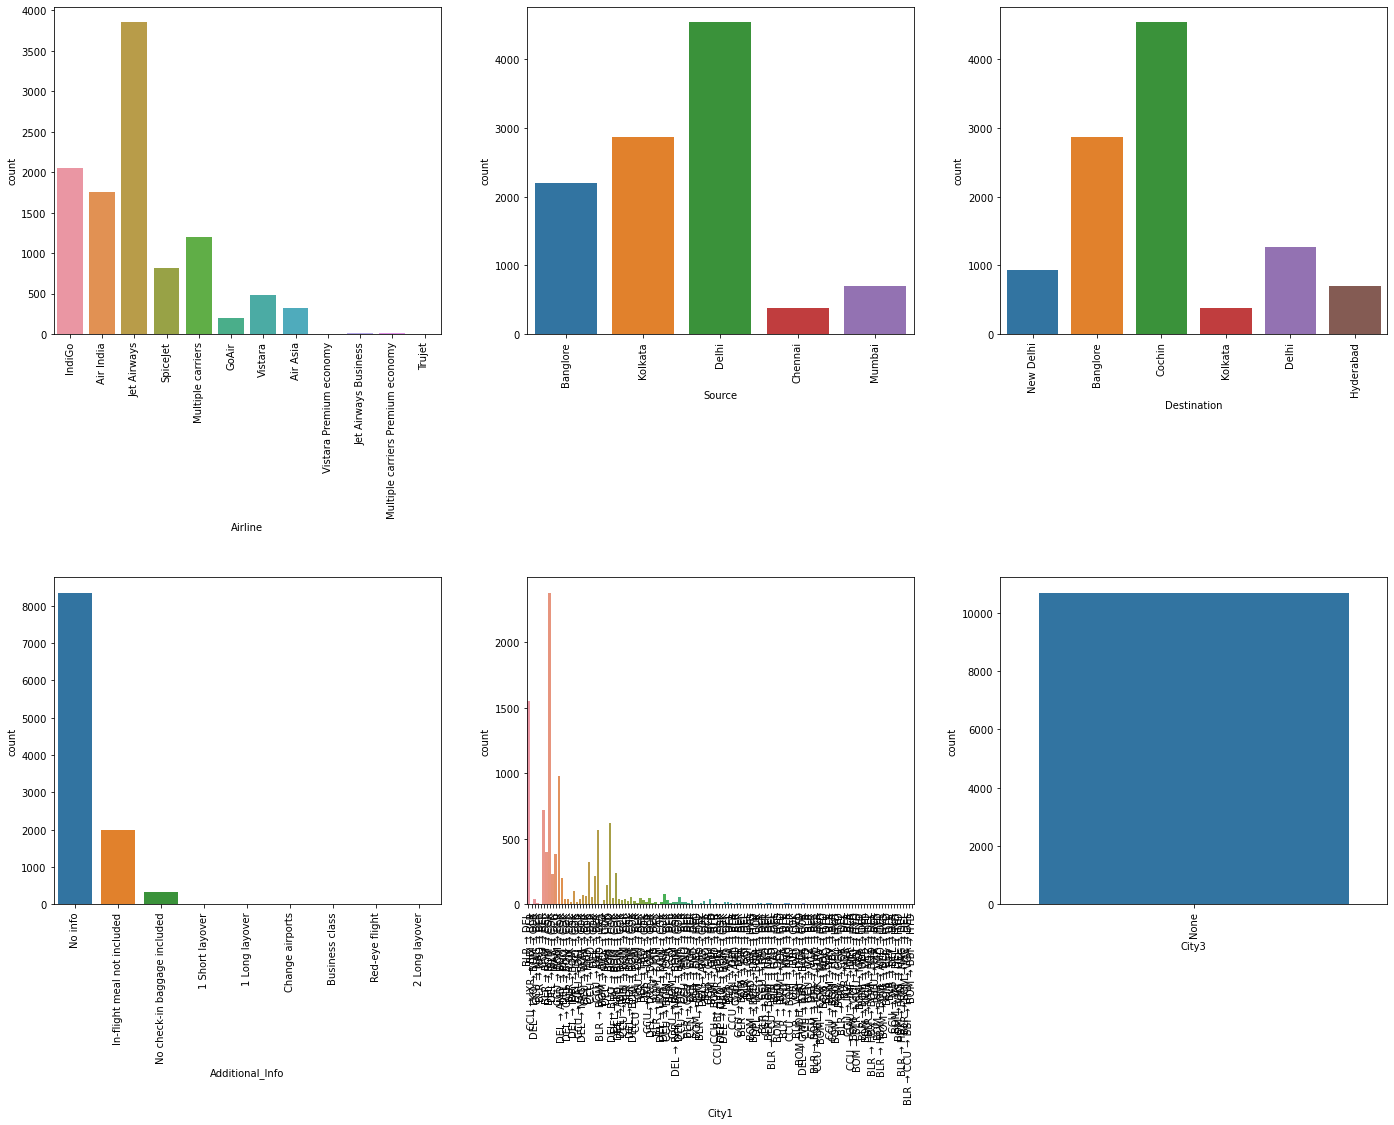

In [64]:
c=1

plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])    
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

<AxesSubplot:xlabel='Price'>

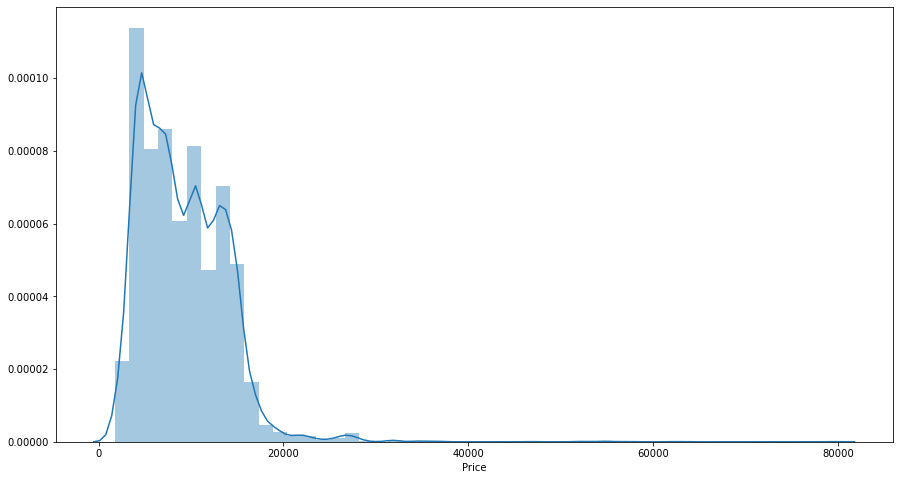

In [65]:
plt.figure(figsize = (15,8))
sns.distplot(data.Price)

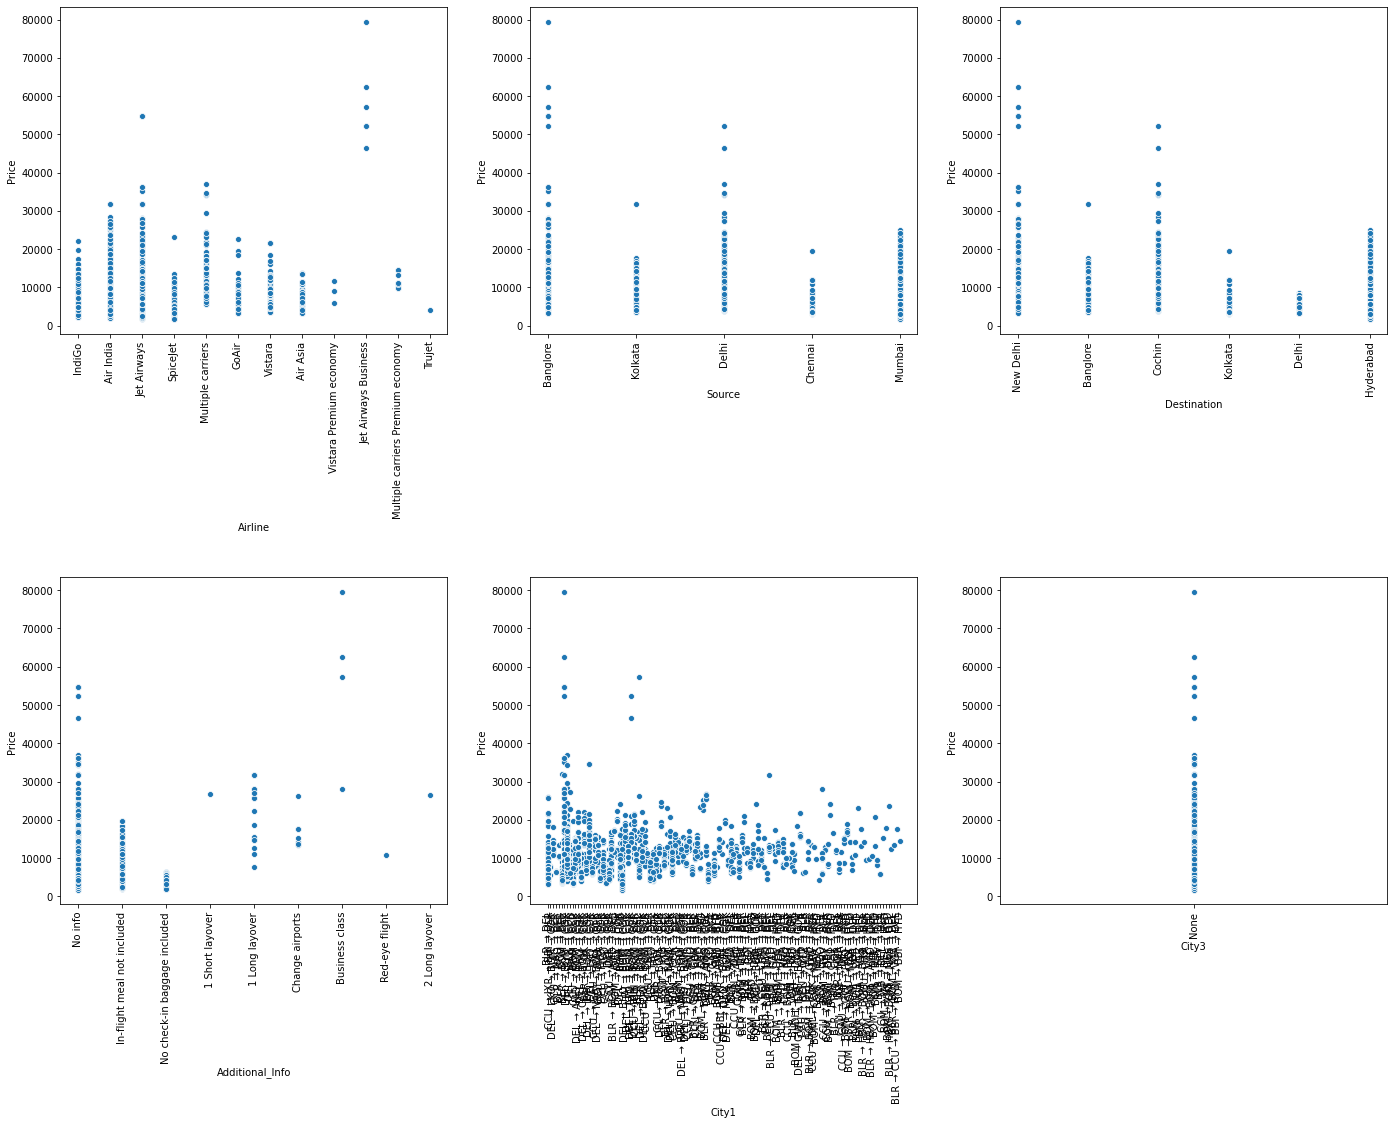

In [66]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x= data[i], y=data.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

In [67]:
data[data.Price>=50000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City1,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
657,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[05, 45]",[10:45],[5h],1,No info,...,BLR → BOM → DEL,None,5,45,1,"[10, 45]",10,45,5,0
1478,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[18, 40]","[00:45, 16, Mar]","[6h, 5m]",1,No info,...,BLR → BOM → DEL,None,18,40,16,"[00, 45]",0,45,6,5
2618,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[22, 50]","[05:05, 16, Mar]","[6h, 15m]",1,No info,...,BLR → BOM → DEL,None,22,50,16,"[05, 05]",5,05,6,15
2924,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[05, 45]",[11:25],"[5h, 40m]",1,Business class,...,BLR → BOM → DEL,None,5,45,1,"[11, 25]",11,25,5,40
5372,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[05, 45]",[12:25],"[6h, 40m]",1,Business class,...,BLR → BOM → DEL,None,5,45,1,"[12, 25]",12,25,6,40
5439,Jet Airways,"[01, 03, 2019]",Banglore,New Delhi,[BLR → BOM → DEL],"[16, 55]",[23:00],"[6h, 5m]",1,No info,...,BLR → BOM → DEL,None,16,55,1,"[23, 00]",23,00,6,5
9715,Jet Airways Business,"[6, 03, 2019]",Delhi,Cochin,[DEL → ATQ → BOM → COK],"[20, 05]","[04:25, 07, Mar]","[8h, 20m]",2,No info,...,DEL → ATQ → BOM → COK,None,20,5,7,"[04, 25]",4,25,8,20
10364,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,[BLR → MAA → DEL],"[09, 45]",[14:25],"[4h, 40m]",1,Business class,...,BLR → MAA → DEL,None,9,45,1,"[14, 25]",14,25,4,40


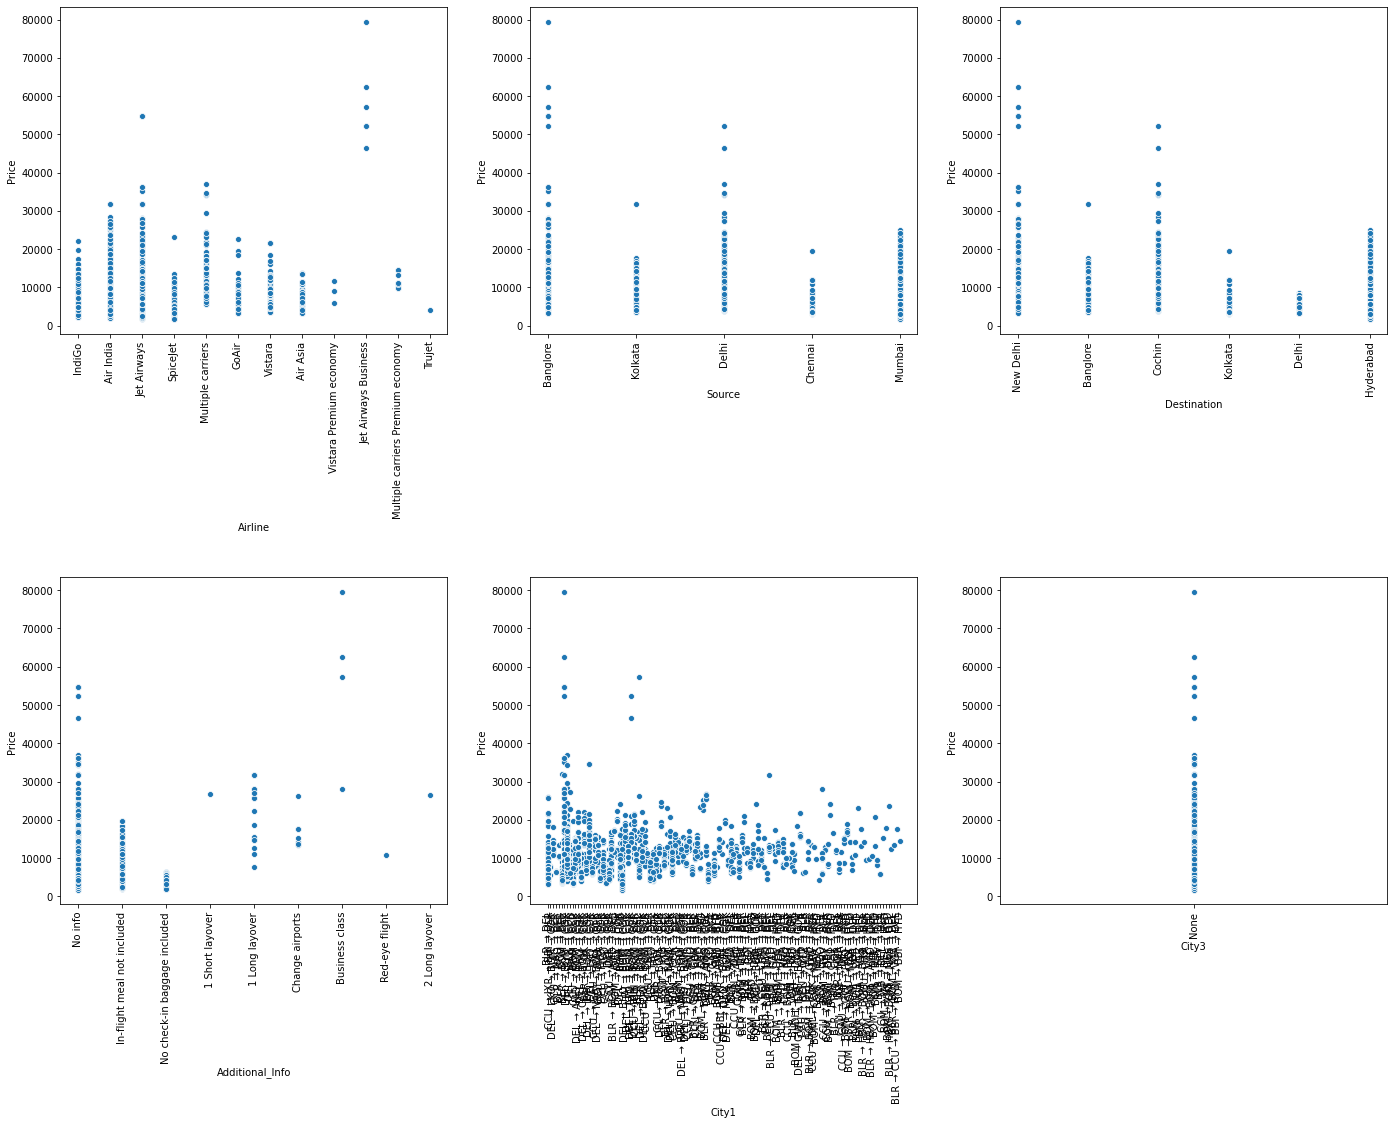

In [68]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x= data[i], y=data.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()
    

# Skewness Treatment

# data.skew()

In [70]:
data.Travel_hours = data.Travel_hours.astype(float)
output = np.log(data.Travel_hours)
output.skew()

-0.2659940694368634

In [71]:
data['Date_of_Journey'] = le.fit_transform(data['Date_of_Journey'].astype(str))
data['Source'] = le.fit_transform(data['Source'].astype(str))
data['Destination'] = le.fit_transform(data['Destination'].astype(str))
data['Route'] = le.fit_transform(data['Route'].astype(str))
data['Dep_Time'] = le.fit_transform(data['Dep_Time'].astype(str))
data['Arrival_Time'] = le.fit_transform(data['Arrival_Time'].astype(str))
data['Duration'] = le.fit_transform(data['Duration'].astype(str))
data['Additional_Info'] = le.fit_transform(data['Additional_Info'].astype(str))
data['City1'] = le.fit_transform(data['City1'].astype(str))
data['City3'] = le.fit_transform(data['City3'].astype(str))
data['Time_of_arrival'] = le.fit_transform(data['Time_of_arrival'].astype(str))

# Encoding the Categorical Data

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        data[i]=le.fit_transform(data[i])

In [79]:
data.Date = data.Date.astype('int64')
data.Total_Stops = data.Total_Stops.astype('int64')
data.Month = data.Month.astype('int64')
data.Year = data.Year.astype('int64')
data.Dep_Time_Hour = data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min = data.Dep_Time_Min.astype('int64')
data.Arrival_date = data.Arrival_date.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Travel_hours = data.Travel_hours.astype('int64')
data.Travel_mins = data.Travel_mins.astype('int64')

# Scaling the data

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Price'].fillna(data['Price'].mean(), inplace=True)

In [82]:
ds_x=data.drop('Price', axis = 1)
y=data['Price']

In [83]:
dataset = sc.fit_transform(ds_x)
x=pd.DataFrame(dataset, columns = ds_x.columns)

In [84]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City1,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,-0.410934,0.021674,-1.658354,2.416648,-1.547122,1.686467,-1.920769,0.421571,-1.220619,0.498678,...,-1.547122,0.0,1.654162,-0.234832,0.955658,-1.557048,-1.800328,-0.889941,-0.970748,1.278965
1,-1.261305,-1.437352,0.890262,-0.973718,0.249870,-1.260186,0.120022,1.288081,1.741761,0.498678,...,0.249870,0.0,-1.303018,1.363790,-1.524701,-0.164527,-0.050871,-0.586988,-0.382120,-0.196456
2,0.014251,1.561757,0.040723,-0.295645,1.175593,-0.621745,-1.383561,-0.712268,1.741761,0.498678,...,1.175593,0.0,-0.607211,0.031605,-0.461690,-1.284598,-1.362964,0.018919,1.030586,-1.671877
3,-0.410934,-1.113124,0.890262,-0.973718,0.440460,0.917063,1.353501,1.066844,0.260571,0.498678,...,0.440460,0.0,0.958355,-1.034142,-0.225465,1.545851,1.407010,0.321872,-0.617571,-0.196456
4,-0.410934,-1.923694,-1.658354,2.416648,-1.247623,0.671509,1.092399,0.993099,0.260571,0.498678,...,-1.247623,0.0,0.610452,1.363790,-1.524701,1.197721,1.115434,0.624825,-0.735297,0.983881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,-1.686491,1.399643,0.890262,-0.973718,-0.294673,1.228099,1.158425,0.384698,-1.220619,0.498678,...,-0.294673,0.0,1.132307,1.630227,-0.579802,1.349082,1.261222,0.018919,-0.970748,0.098628
10677,-1.261305,0.426959,0.890262,-0.973718,-0.294673,1.391802,1.308483,0.393916,-1.220619,0.498678,...,-0.294673,0.0,1.306259,1.097353,1.546220,1.515579,1.407010,-0.284035,-0.970748,0.393713
10678,0.014251,0.426959,-1.658354,0.382428,-1.547122,-0.818188,-0.132075,0.864044,-1.220619,0.498678,...,-1.547122,0.0,-0.781163,-0.234832,1.546220,-0.482385,-0.342447,-0.284035,-0.853022,-1.671877
10679,2.565364,-1.923694,-1.658354,2.416648,-1.547122,-0.261598,0.195051,0.403134,-1.220619,0.498678,...,-1.547122,0.0,-0.259307,0.298042,-1.524701,-0.013166,0.094917,-0.889941,-0.970748,0.688797


# Fitting the Regression Models

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [86]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [87]:

for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <=0.1:
        print(i)
        print('R2 score is ', r2_score(y_test, pred))
        print('R2 for train data ', r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is ', mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ', (mean_squared_error(y_test, pred, squared = False)))
        print('***************************')
        

SVR()
R2 score is  0.024590249221981608
R2 for train data  0.014405863214166037
Mean absolute error is  3524.6157786401322
Mean squared error is  20704121.969596192
Root mean squared error is  4550.178234926209
***************************
KNeighborsRegressor()
R2 score is  0.7398917802677079
R2 for train data  0.7924817618533209
Mean absolute error is  1377.2191575663028
Mean squared error is  5521076.965179408
Root mean squared error is  2349.6972071267837
***************************
LinearRegression()
R2 score is  0.45119747775500296
R2 for train data  0.4385580870307657
Mean absolute error is  2415.1800748886612
Mean squared error is  11648924.309726624
Root mean squared error is  3413.0520520095533
***************************


In [88]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
for i in [rfr, ad, gd]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <=0.2:
        print(i)
        print('R2 score is ', r2_score(y_test, pred))
        print('R2 for train data ', r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is ', mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ', (mean_squared_error(y_test, pred, squared = False)))
        print('***************************')
        

RandomForestRegressor()
R2 score is  0.8893250999210325
R2 for train data  0.979945881131586
Mean absolute error is  666.9401562538692
Mean squared error is  2356293.3028819403
Root mean squared error is  1535.022248334512
***************************
AdaBoostRegressor()
R2 score is  0.2664802611406051
R2 for train data  0.3314025502002679
Mean absolute error is  3308.6076580696263
Mean squared error is  15616798.813216746
Root mean squared error is  3951.8095618610905
***************************
GradientBoostingRegressor()
R2 score is  0.7934057104934524
R2 for train data  0.8469880465347002
Mean absolute error is  1263.9382615239094
Mean squared error is  4398438.493557229
Root mean squared error is  2097.245453817275
***************************


# Cross validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
for i in range(2,9):
    cv = cross_val_score(rfr, x, y, cv=i)
    print(rfr, cv.mean())

RandomForestRegressor() 0.8517362471798681
RandomForestRegressor() 0.863805063657953
RandomForestRegressor() 0.8748886783132952
RandomForestRegressor() 0.8842938306651729
RandomForestRegressor() 0.8812087699320168
RandomForestRegressor() 0.8855266055078328
RandomForestRegressor() 0.8853587013360531


In [92]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv=i)
    print(gd, cv.mean())

GradientBoostingRegressor() 0.8162253712994523
GradientBoostingRegressor() 0.8214172523746082
GradientBoostingRegressor() 0.8195520125675095
GradientBoostingRegressor() 0.8278349365906607
GradientBoostingRegressor() 0.8237080689658889
GradientBoostingRegressor() 0.8247777491079847
GradientBoostingRegressor() 0.8269366525199366


# Hypertuning the model

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'n_estimators':[10, 30, 50, 70, 100], 'max_depth': [None, 1, 2, 3], 'max_samples': [50, 100, 250, 500, 1000], 'min_samples_split':[2, 4, 10]}
gcv_rfr= GridSearchCV(rfr, param_grid, cv = 3)

In [95]:
res = gcv_rfr.fit(x_train, y_train)

In [96]:
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 50}

In [97]:
param_grid2= {'alpha': [0.9, 0.09, 0.1], 'learning_rate': [0.1,0.01], 'max_depth': [3,4,5], 'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4], 'n_estimators': [100, 50, 10]}
gcv_gd = GridSearchCV(gd, param_grid2, cv = 3)
res2 = gcv_gd.fit(x_train, y_train)
res2.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [98]:
model = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 1, min_samples_split = 4, n_estimators =100)


# Result

In [99]:
import joblib
joblib.dump(model, 'flight_price.obj')

['flight_price.obj']

In [100]:
model = joblib.load('flight_price.obj')
model.fit(x_train, y_train)
pred = model.predict(x_test)
predicted_values = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
pred

array([14725.52440932, 10665.30151204, 13758.16045537, ...,
       15385.52235575,  7268.19373721,  9695.88586756])

In [101]:
predicted_values

,Actual,Predicted
8476,14714,14725.524409
6421,10262,10665.301512
3102,12819,13758.160455
5795,9564,8187.285791
8295,6218,5880.965121
...,...,...
2216,3210,3641.335625
5326,13067,13766.541691
5661,15077,15385.522356
6158,7229,7268.193737


In [102]:
r2_score(y_test, pred)

0.8768853606511733